In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import seaborn as sns
%matplotlib inline 

pd.set_option('display.max_columns', None)

df1 = pd.read_csv("adult.data",header=None)
df2 = pd.read_csv("adult.test",header=None)

df = pd.concat([df1, df2], ignore_index=True)

df = df.rename(columns={0: 'age', 1 : 'workclass', 2:'fnlwgt', 3:'education', 4:'education-num', 5:'marital-status', 
                       6:'occupation', 7:'relationship', 8:'race', 9:'sex', 10:'capital-gain', 11:'capital-loss', 
                       12:'hours-per-week', 13:'native-country', 14:'income' })

df = df.drop_duplicates()

df.drop(df[df['workclass']==' ?'].index, inplace=True)
df.drop(df[df['occupation']==' ?'].index, inplace=True)
df.drop(df[df['native-country']==' ?'].index, inplace=True)

df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

df.loc[df.income == '<=50K.', 'income'] = '<=50K'
df.loc[df.income == '>50K.', 'income'] = '>50K'

dfc = df.copy()



dfc = pd.get_dummies(dfc, columns=['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'
                                       ], drop_first=False)

dfc = pd.get_dummies(dfc, columns=['income'], drop_first=True)



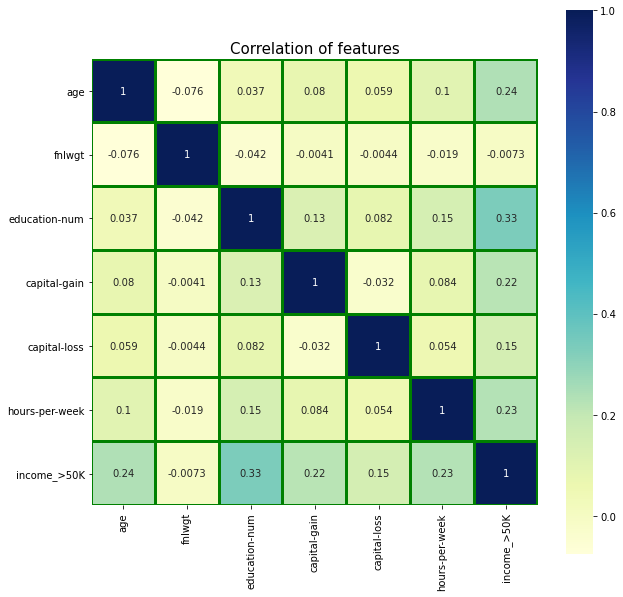

In [6]:
tc = dfc.iloc[:,[0, 1, 2, 3, 4, 5, -1]].corr()

plt.figure(figsize=(10,10))
plt.title('Correlation of features',size=15)
sns.heatmap(tc, linewidths=2, cmap = 'YlGnBu',
    linecolor='green',square=True, annot = True)

Text(0.5, 1.5, 'Correlation of features')

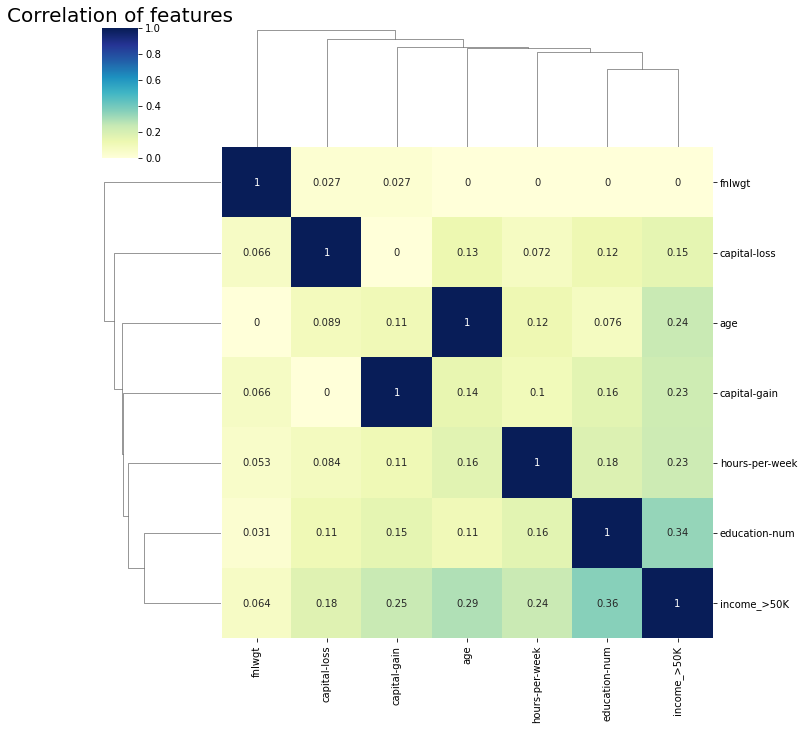

In [5]:

sns.clustermap(tc,cmap='YlGnBu',standard_scale=1,figsize=(10,10),annot = True)
plt.title('Correlation of features', y=1.5, size=20)

In [37]:
#MARITAL STATUS

Text(0.5, 1.5, 'Marital Status Correlation')

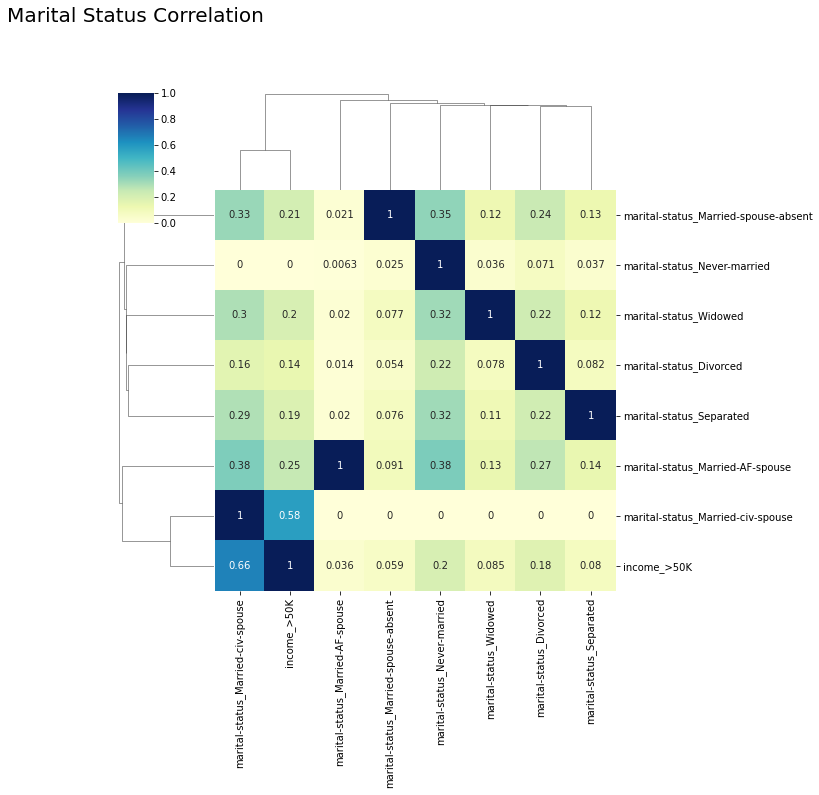

In [69]:

kc= dfc.loc[:, dfc.columns.str.contains('marital-status') | dfc.columns.str.contains('income')].corr()
sns.clustermap(kc,cmap='YlGnBu',standard_scale=1,figsize=(10,10),annot = True)
plt.title("Marital Status Correlation", y=1.5, size=20)

In [39]:
#WORKCLASS

Text(0.5, 0, 'Work class')

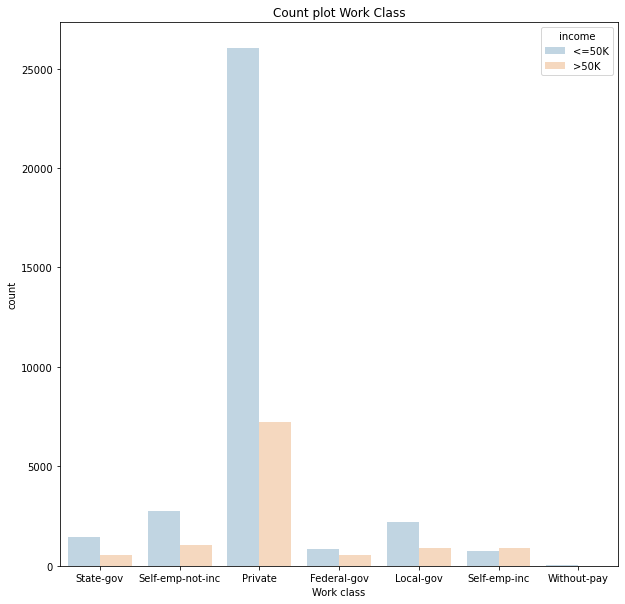

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="workclass",hue='income',alpha=0.3)
plt.title("Count plot Work Class")
plt.xlabel("Work class")

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


<AxesSubplot:title={'center':'Work Class Correlation'}>

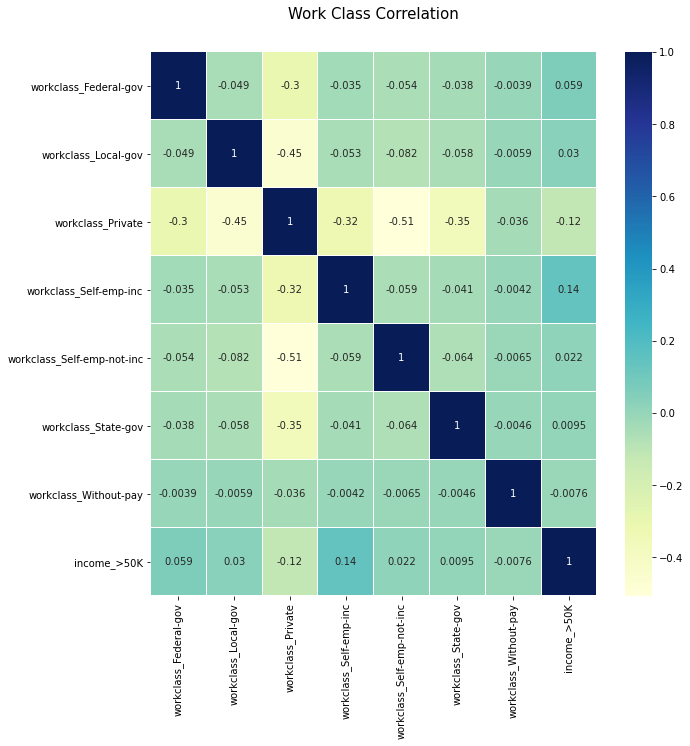

In [41]:
colormap = plt.cm.YlGnBu
plt.figure(figsize=(10,10))
plt.title('Work Class Correlation', y=1.05, size=15)
sns.heatmap(
    dfc.loc[:, dfc.columns.str.contains('workclass') | dfc.columns.str.contains('income')].corr(),
    linewidths=0.1,vmax=1.0, square=False, cmap=colormap, linecolor='white', annot=True)


Text(0.5, 1.5, 'Work Class Correlation')

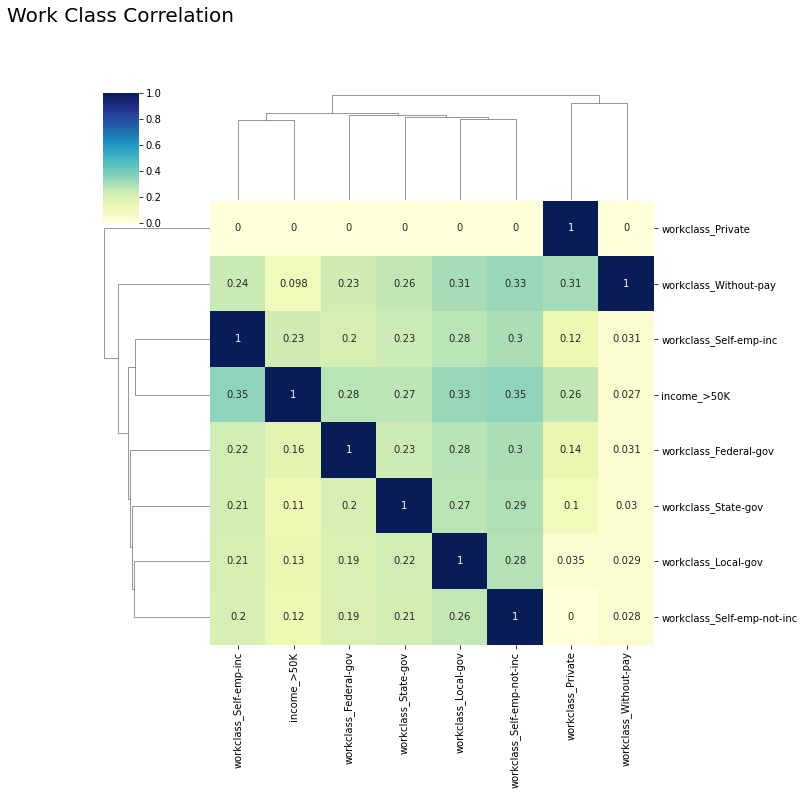

In [42]:

kc= dfc.loc[:, dfc.columns.str.contains('workclass') | dfc.columns.str.contains('income')].corr()
sns.clustermap(kc,cmap='YlGnBu',standard_scale=1,figsize=(10,10),annot = True)
plt.title("Work Class Correlation", y=1.5, size=20)

In [4]:
#RACE
import dexplot as dxp

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


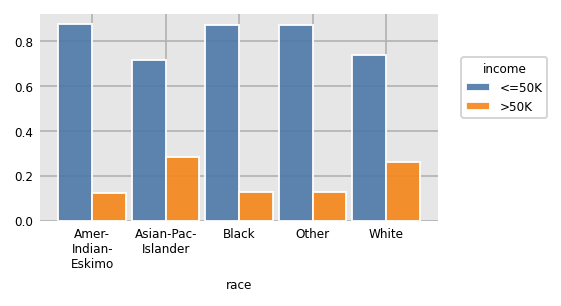

In [5]:

dxp.count('race', data=df, split='income',normalize='race')


Text(0.5, 0, 'Race')

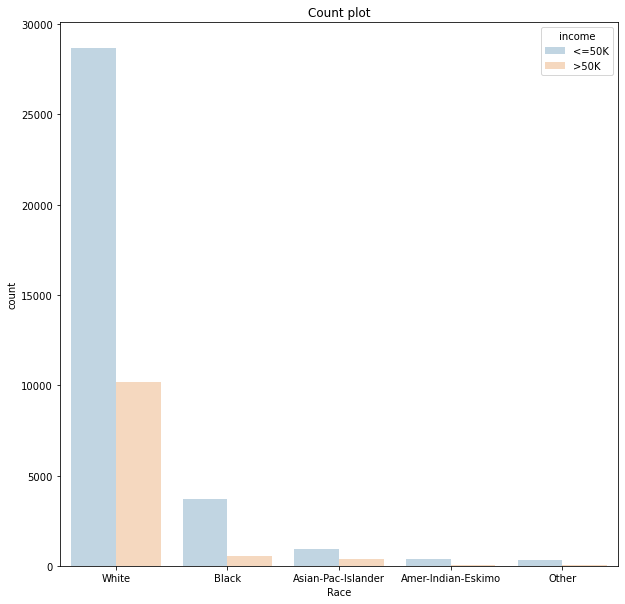

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="race",hue='income',alpha=0.3)
plt.title("Count plot")
plt.xlabel("Race")

Text(0.5, 1.5, 'Race Correlation')

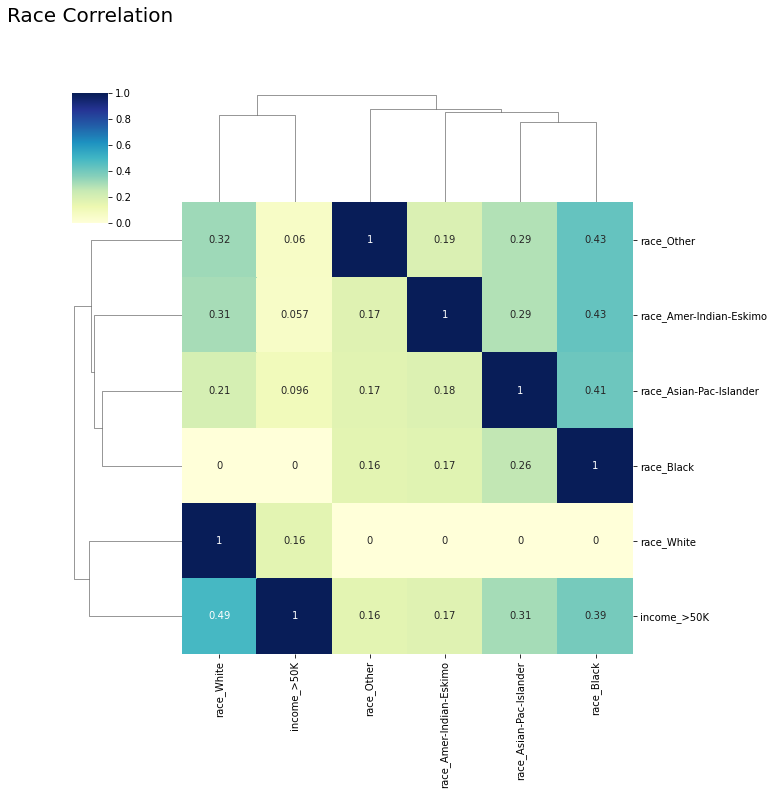

In [52]:

kc= dfc.loc[:, dfc.columns.str.contains('race') | dfc.columns.str.contains('income')].corr()
sns.clustermap(kc,cmap='YlGnBu',standard_scale=1,figsize=(10,10),annot = True)
plt.title("Race Correlation", y=1.5, size=20)

In [ ]:
#AGE

Text(0.5, 0, 'Income')

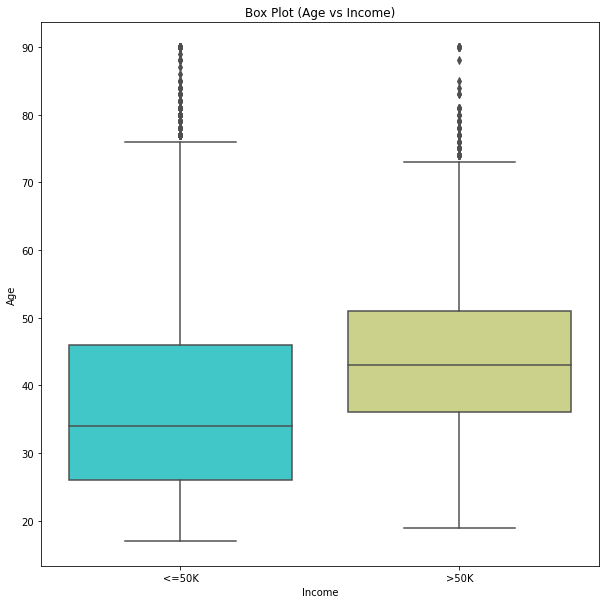

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='age',data=df,palette='rainbow')
plt.title("Box Plot (Age vs Income)")
plt.ylabel("Age")
plt.xlabel("Income")

Text(0.5, 0, 'Age')

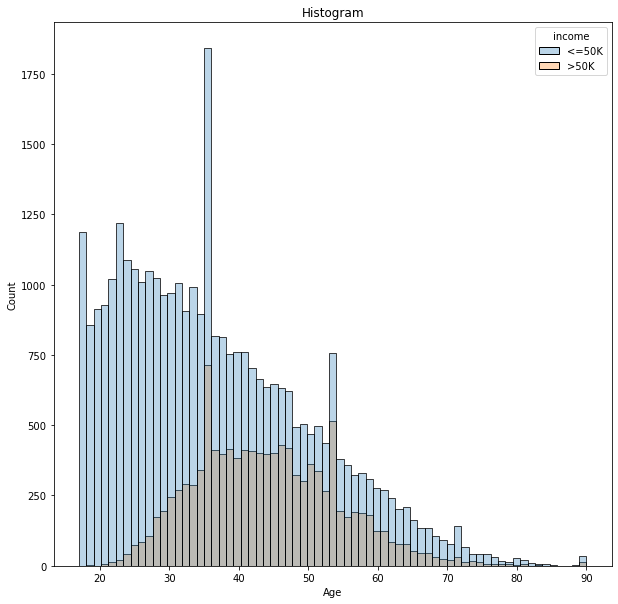

In [53]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="age",hue='income',alpha=0.3)
plt.title("Histogram")
plt.xlabel("Age")

In [22]:
#CAPITAL GAIN

Text(0.5, 0, 'capital-gain')

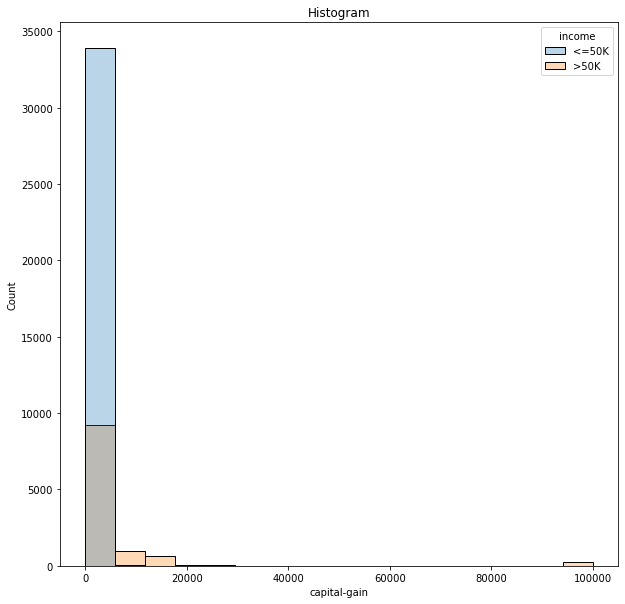

In [54]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="capital-gain",hue='income',alpha=0.3)
plt.title("Histogram")
plt.xlabel("capital-gain")

Text(0.5, 0, 'capital-loss')

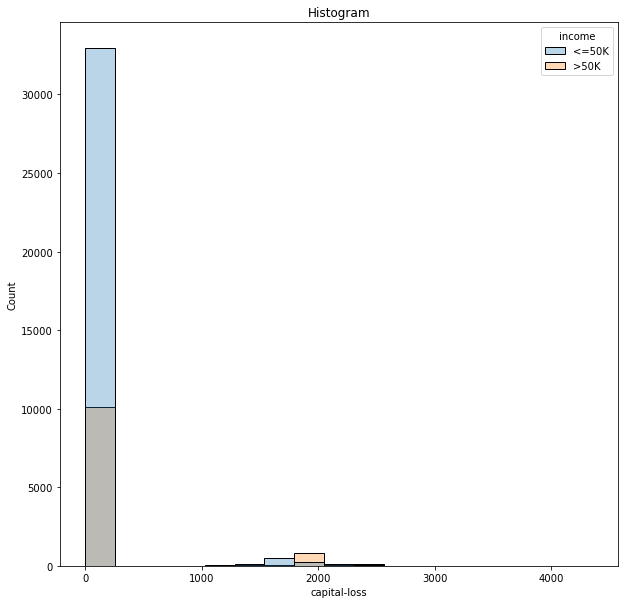

In [55]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="capital-loss",hue='income',alpha=0.3)
plt.title("Histogram")
plt.xlabel("capital-loss")

In [56]:
#SEX

Text(0.5, 0, 'Sex')

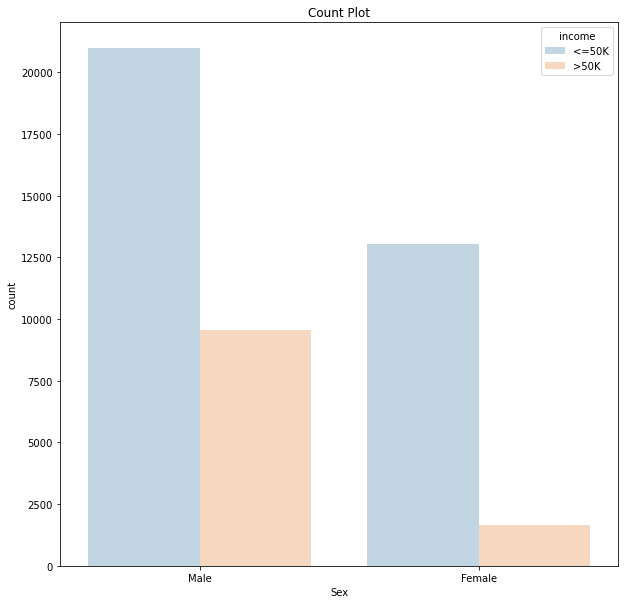

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="sex",hue='income',alpha=0.3)
plt.title("Count Plot")
plt.xlabel("Sex")

In [58]:
#FINAL WEIGHT

Text(0.5, 0, 'Income')

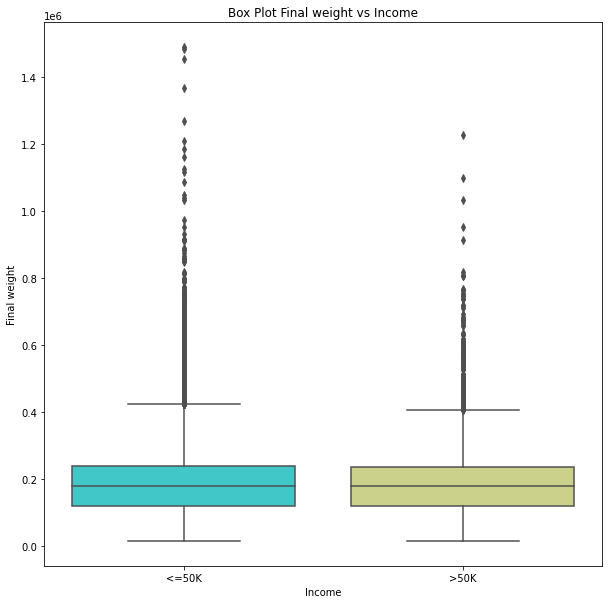

In [59]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='fnlwgt',data=df,palette='rainbow')
plt.title("Box Plot Final weight vs Income")
plt.ylabel("Final weight")
plt.xlabel("Income")

Text(0.5, 0, 'Final weight')

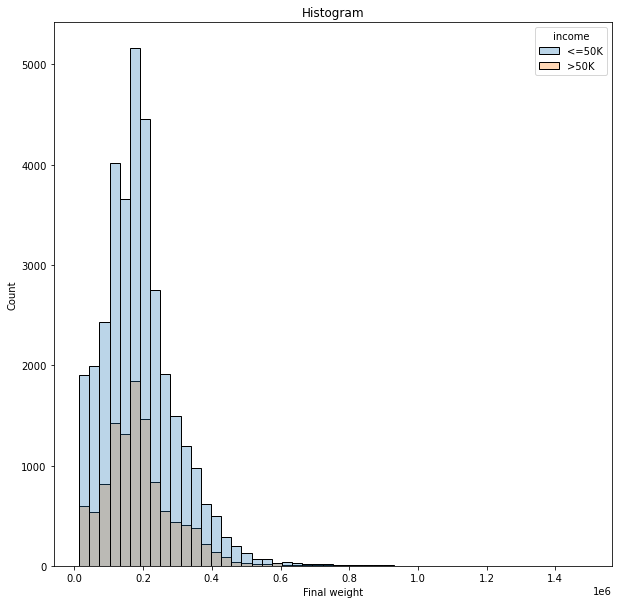

In [60]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="fnlwgt",hue='income',alpha=0.3,bins=50)
plt.title("Histogram")
plt.xlabel("Final weight")

In [61]:
#EDUCATION NUMBER

Text(0.5, 0, 'Income')

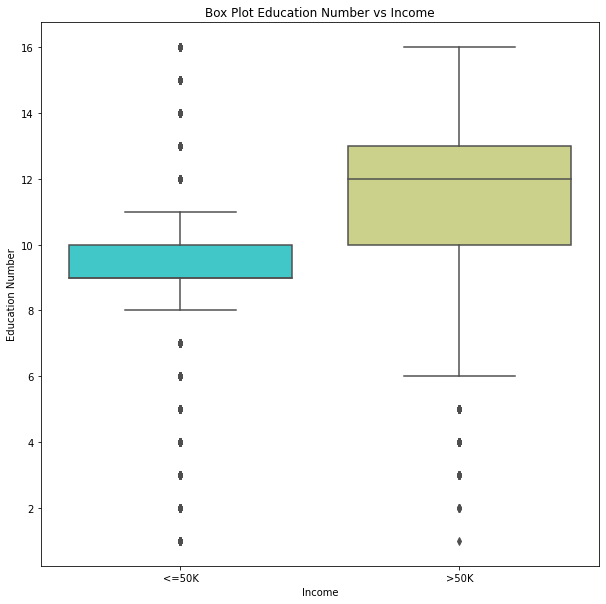

In [62]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='education-num',data=df,palette='rainbow')
plt.title("Box Plot Education Number vs Income")
plt.ylabel("Education Number")
plt.xlabel("Income")

Text(0.5, 0, 'Final weight')

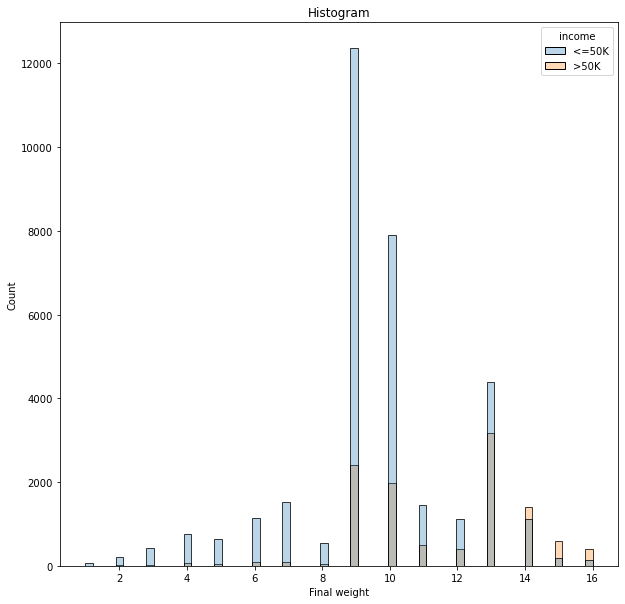

In [63]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="education-num",hue='income',alpha=0.3)
plt.title("Histogram")
plt.xlabel("Final weight")

In [64]:
#HOURS PER WEEK

Text(0.5, 0, 'Income')

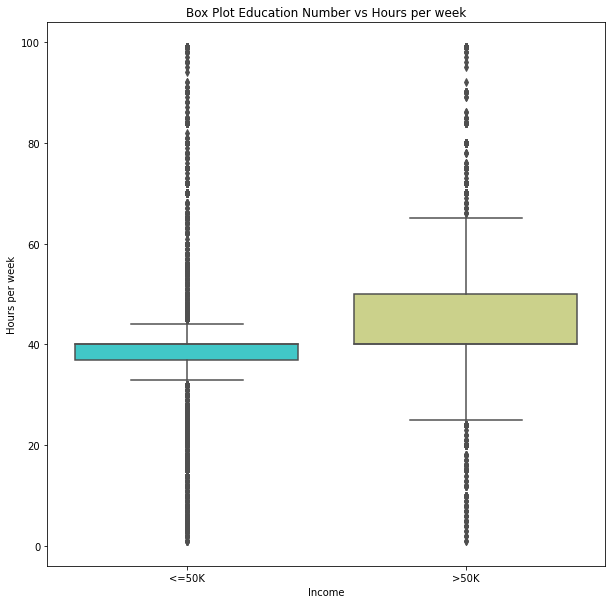

In [65]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='hours-per-week',data=df,palette='rainbow')
plt.title("Box Plot Education Number vs Hours per week")
plt.ylabel("Hours per week")
plt.xlabel("Income")

Text(0.5, 0, 'Hours per week')

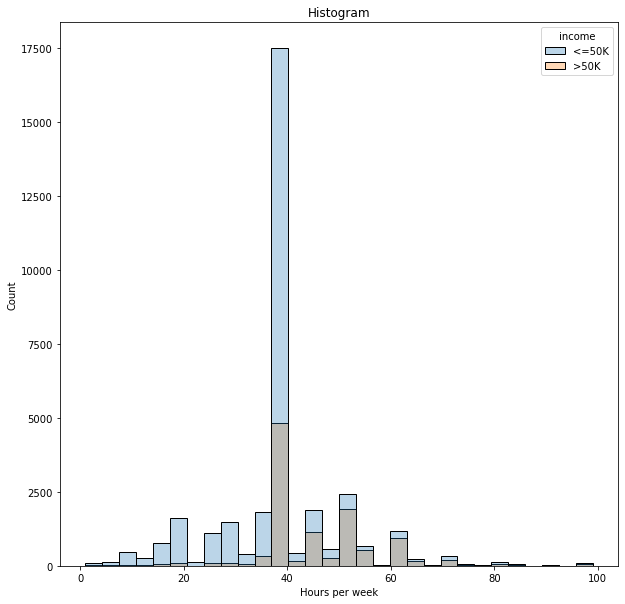

In [66]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x="hours-per-week",hue='income',alpha=0.3,bins=30)
plt.title("Histogram")
plt.xlabel("Hours per week")